In [1]:
from __future__ import division
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import evolutionary.genetic_algorithms.initializations as initialization
import evolutionary.genetic_algorithms.selections as selection
import evolutionary.genetic_algorithms.mutations as mutation
import evolutionary.genetic_algorithms.crossovers as crossover
import evolutionary.genetic_algorithms.replacements as replacement


import evolutionary.optim_functions as functions
from evolutionary import Population

np.random.seed(82634)

# Define the problem to solvea and get its fitness function
problem = functions.Ackley(minimize=True)
fitness_function = problem.evaluate

# Initalize vars
n_dimensions = 10
n_population = 100
n_iterations = 1
xover_prob = 0.8
mutat_prob = 1

# Define the bounds to explore the problem
upper = np.ones((n_population, n_dimensions))*problem.upper
lower = np.ones((n_population, n_dimensions))*problem.lower

# Log results var
mean = np.array([])
median = np.array([])
worst = np.array([])
best = np.array([])
best_individual = np.array([])

# Create the class Population and initialize its chromosomes
population = Population(chromosomes=initialization.uniform
                        (n_population, lower, upper, n_dimensions))

# Iterate simulating the evolutionary process
for i in range(n_iterations):
    # Apply the function in each row to get the array of fitness
    fitness = fitness_function(population.chromosomes)
    
    # Log the values
    mean = np.append(mean, np.mean(fitness))
    median = np.append(median, np.median(fitness))
    worst = np.append(worst, np.max(fitness))
    best = np.append(best, np.min(fitness))
    
    # Update the best chromosome
    if i>0 and best[i-1] > best[i]:
        best_individual = population.chromosomes[np.argmax(fitness)]
    
    # Print the iteration result
    if (i+1)%1 == 0:
        print "Iteration", i+1, "Best", best[i],\
            "Mean", mean[i], "Median", median[i], "Worst", worst[i]
    
    # Select a subgroup of parents
    parents, idx = selection.wheel(population.chromosomes, fitness, N=n_population, 
                                   M=n_population, iterations=1, minimize=True)
    
    # Use recombination to generate new children
    children = crossover.blend(parents, xover_prob, upper[idx], lower[idx])
    
    # Mutate the generated children
    children = mutation.uniform(children, mutat_prob, 
                                upper[idx], lower[idx])#, i, n_iterations)
    
    # Replace the current chromosomes of parents and childrens to 
    # create the new chromosomes
    population.chromosomes = replacement.elitist(population.chromosomes, fitness, 
                                                 children, fitness_function(children),
                                                 n_population, minimize = True)

print best_individual
if i > 0:
    x = np.arange(0, n_iterations, 20)
    plt.plot(x, mean[::20])
#     plt.plot(x, median[::10])
    plt.plot(x, worst[::20], 'o')
    plt.plot(x, best[::20])
    plt.legend(['Mean', 'Worst value', 'Best value'], loc='upper right')

    plt.show()

Iteration 1 Best 18.6988217875 Mean 21.0336694496 Median 21.1362319795 Worst 21.7307051346
[ 21.63810557  21.59778479  20.02841978  21.02507542  21.34727215
  21.22715957  21.52581698  21.05372787  19.82566706  21.09801038
  21.19469737  21.09516851  21.1564423   21.04432376  21.28208789
  20.72184677  21.07157917  20.84901989  21.49181973  21.23352219
  21.0925312   21.46685106  21.19435258  21.38762625  21.24913547
  20.67915076  21.1192195   21.39846866  21.15594462  21.24360915
  20.93021861  21.20155579  20.85922276  20.73367958  21.19195074
  21.08680822  21.60611989  21.41151358  20.22922402  20.69893967
  21.30289808  21.02987581  21.55855916  20.31204568  21.4985037
  21.57339024  21.04912444  21.08161954  21.48438496  20.85058531
  20.74951276  21.00523858  21.47307025  21.37156943  21.06998596
  21.04050068  21.19793477  21.27833202  21.03822773  21.36531384
  20.87233496  20.63529834  21.62955602  21.04446422  20.79554595
  20.05274598  19.04443914  21.36803527  21.31183739

([array([  0.,   1.,   0.,  48.,   0.,   0.,   1.,   0.,   0.,   0.]),
  array([  0.,   0.,   1.,   0.,   0.,  49.,   0.,   0.,   0.,   0.]),
  array([  0.,   0.,   0.,   0.,   1.,  48.,   1.,   0.,   0.,   0.]),
  array([  0.,   0.,   0.,   0.,  48.,   1.,   0.,   0.,   1.,   0.]),
  array([  1.,   0.,   0.,  48.,   0.,   0.,   0.,   0.,   1.,   0.]),
  array([  0.,   0.,   2.,  48.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([  1.,   0.,   0.,   0.,   0.,   0.,  48.,   1.,   0.,   0.]),
  array([  0.,   0.,   0.,   0.,   0.,  48.,   0.,   0.,   1.,   1.]),
  array([  0.,   0.,   0.,   0.,  49.,   0.,   0.,   0.,   0.,   1.]),
  array([  0.,   0.,  49.,   0.,   0.,   1.,   0.,   0.,   0.,   0.])],
 array([-10.71854122,  -8.41571268,  -6.11288413,  -3.81005559,
         -1.50722705,   0.79560149,   3.09843004,   5.40125858,
          7.70408712,  10.00691566,  12.30974421]),
 <a list of 10 Lists of Patches objects>)

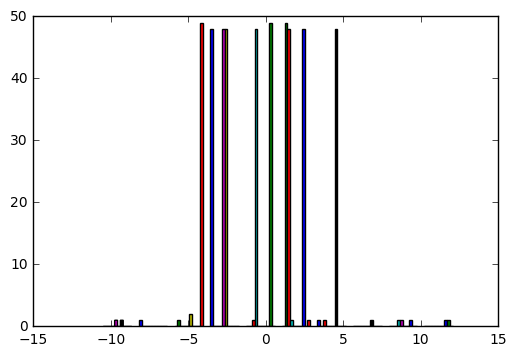

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(population.chromosomes)

[ 0.23076923  0.38461538  0.07692308  0.30769231  0.        ]
[ 0.38461538  0.30769231  0.          0.07692308  0.23076923]
[ 0.          0.38461538  0.30769231  0.07692308  0.23076923]
[ 0.38461538  0.23076923  0.          0.30769231  0.07692308]
[ 0.30769231  0.38461538  0.07692308  0.          0.23076923]
[ 0.07692308  0.38461538  0.          0.23076923  0.30769231]
[ 0.07692308  0.30769231  0.          0.23076923  0.38461538]
[ 0.          0.38461538  0.30769231  0.23076923  0.07692308]
[ 0.23076923  0.30769231  0.          0.38461538  0.07692308]
[ 0.30769231  0.07692308  0.23076923  0.          0.38461538]
[ 0.38461538  0.07692308  0.23076923  0.30769231  0.        ]
[ 0.23076923  0.30769231  0.38461538  0.          0.07692308]
[ 0.          0.30769231  0.38461538  0.23076923  0.07692308]
[ 0.30769231  0.38461538  0.07692308  0.23076923  0.        ]
[ 0.30769231  0.38461538  0.          0.07692308  0.23076923]
[ 0.38461538  0.07692308  0.          0.23076923  0.30769231]
[ 0.2307

(array([  58.,    0.,    0.,  238.,    0.,    0.,  329.,    0.,    0.,  375.]),
 array([ 0. ,  0.3,  0.6,  0.9,  1.2,  1.5,  1.8,  2.1,  2.4,  2.7,  3. ]),
 <a list of 10 Patch objects>)

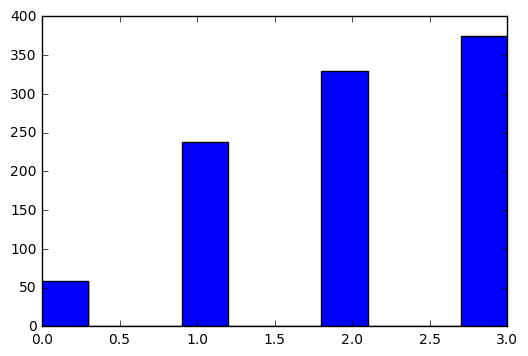

In [350]:
import evolutionary.genetic_algorithms.selections as selection
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
reload(selection)

parents = np.array([[1,2,3,4], [2,3,4,5], [3,2,1,5],[4,5,3,2],[5,3,1,2]])
fitness = np.array([5.,3.,2.,1.,6.])

# print (selection.tournament(parents,fitness,N=5,M=2,iterations=1))

a = np.array([])
for i in range(1000):
    a = np.append(a ,selection.wheel(parents,fitness,N=5,M=1, iterations=1)[1])

plt.hist(a)

In [18]:
from __future__ import division
import evolutionary.genetic_algorithms.crossovers as crossover
import numpy as np

parents = np.array([[1.,2.,3.,4.], [2.,3.,4.,5.], [3.,2.,1.,5.],[4.,5.,3.,2.],[5.,3.,1.,2.]])

print crossover.blend(parents, 1, 32, -32)
print crossover.blend(parents, 1, 32, -32)

[[ 4.40266778  6.20800333  3.80533555  0.79199667]
 [ 2.59733222  0.79199667  0.19466445  6.20800333]
 [ 6.89925079  3.4748127   0.0503746   1.0503746 ]
 [-0.89925079  1.5251873   3.9496254   4.9496254 ]]
[[ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]


In [1]:
import numpy as np
import evolutionary.genetic_algorithms.mutations as mutation
a = np.array([1.,4.,3.,2.,5.,6.,0.])
b= np.array([[1,2,3,4,5,6,7], [7,6,5,4,3,2,1]])
u = np.ones(a.shape)*6
l = np.ones(a.shape)*0

print mutation.non_uniform(a, 1, upper=u, lower=l, t=1, tmax=100)
print mutation.uniform(a,1, upper=u, lower=l)

np.random.uniform([1,6],[3,8],2)

[[ 0.70327834  1.85329865  2.71474666  3.87194133  4.42720462  4.73623776
   5.89259592]]
[[ 0.36633262  4.606763    4.2482052   0.74082065  4.61289602  5.04159376
   0.51315189]]


array([ 1.43957738,  7.34221818])

In [2]:
import numpy as np
parents=np.array([[-1,2,3], [2,5,1]])
upper = np.array([[4,4,4], [4,4,4]])
lower = np.array([[1,1,1], [1,1,1]])
out = parents>upper
a = np.zeros(parents.shape)

a[out]=10
print out, a

[[False False False]
 [False  True False]] [[  0.   0.   0.]
 [  0.  10.   0.]]
